***OASIS INFOBYTE ***

**TASK-05**

**SALES PREDICTION USING PYTHON**

In [1]:
#dataset : /content/Advertising.csv

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv('/content/Advertising.csv')
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [6]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
data.shape

(200, 5)

In [8]:
data.size

1000

In [10]:
data.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [12]:
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [14]:
data.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

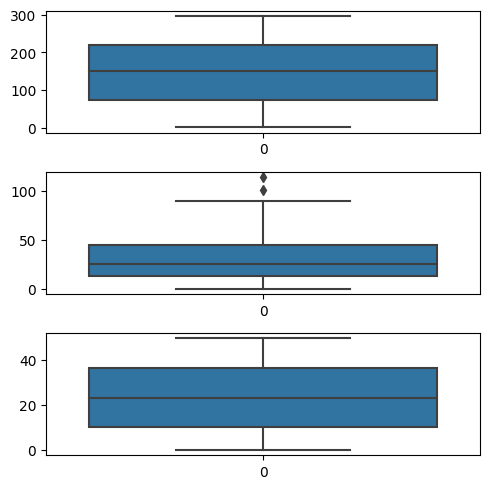

In [16]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(data['TV'], ax = axs[0])
plt2 = sns.boxplot(data['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(data['Radio'], ax = axs[2])
plt.tight_layout()

<Axes: xlabel='Newspaper', ylabel='Density'>

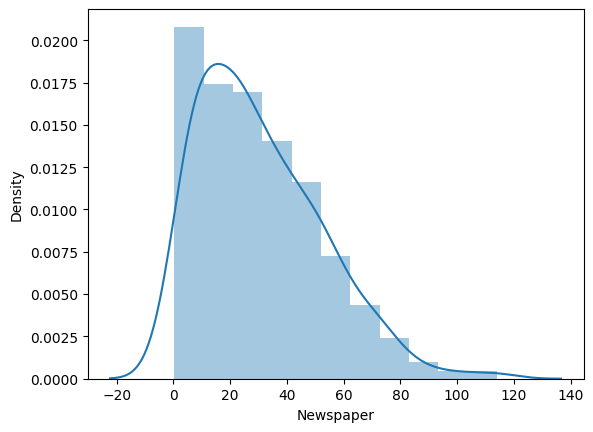

In [17]:
sns.distplot(data['Newspaper'])

In [18]:
p = data.Newspaper.quantile(0.75) - data.Newspaper.quantile(0.25)

In [19]:
lb = data['Newspaper'].quantile(0.25) - (p*1.5)
ub = data['Newspaper'].quantile(0.75) + (p*1.5)
print(lb)
print(ub)

-35.775000000000006
93.625


In [20]:
df = data.copy()

In [21]:
df.loc[df['Newspaper']>93, 'Newspaper'] = 93

<Axes: >

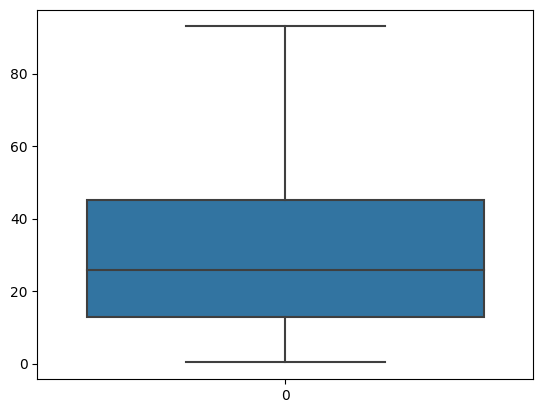

In [22]:
sns.boxplot(df['Newspaper'])

<Axes: >

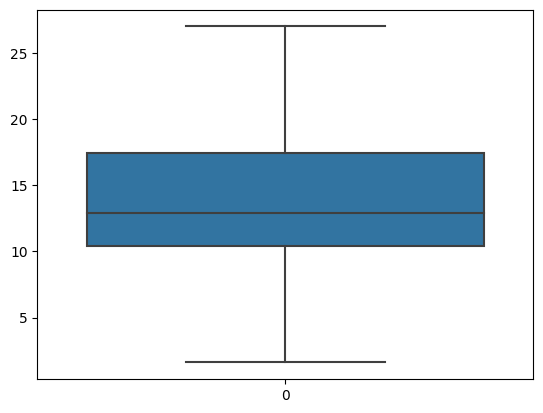

In [23]:
sns.boxplot(df['Sales'])

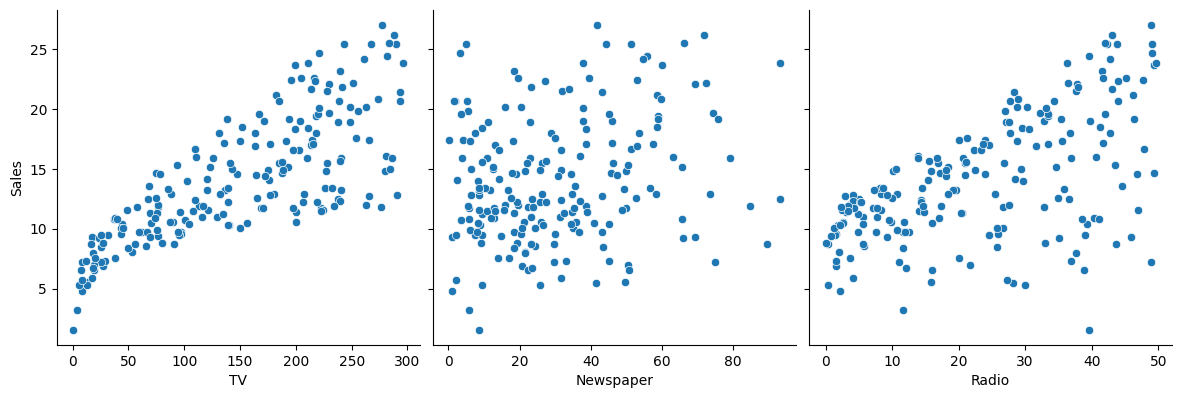

In [25]:
sns.pairplot(df, x_vars=['TV','Newspaper','Radio'],
             y_vars='Sales' , height=4, aspect=1, kind='scatter')
plt.show()

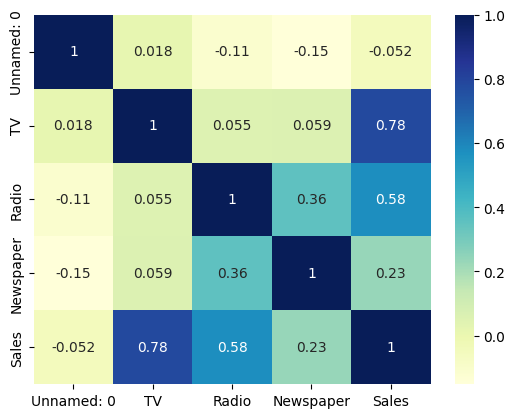

In [29]:
sns.heatmap(df.corr(), cmap='YlGnBu', annot = True)
plt.show()

In [31]:
impf = list(data.corr()['Sales'][(data.corr()['Sales']>+0.5)|(data.corr()['Sales']<-0.5)].index)

In [32]:
print(impf)

['TV', 'Radio', 'Sales']


In [33]:
x = df['TV']
y = df['Sales']

In [34]:
x = x.values.reshape(-1,1)

In [35]:
x

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [36]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [37]:
print(x.shape,y.shape)

(200, 1) (200,)


In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33)

In [39]:
print(x_train.shape,y_train.shape)

(134, 1) (134,)


In [40]:
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.model_selection import cross_val_score , GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [43]:
knn = KNeighborsRegressor().fit(x_train , y_train)
knn

KNeighborsRegressor()

In [44]:
knn_train_pred = knn.predict(x_train)

In [45]:
knn_test_pred = knn.predict(x_test)

In [46]:
print(knn_train_pred, knn_test_pred)

[10.98  7.38 11.54  4.74 18.   19.16 13.52 11.08  7.38  4.74 19.4  17.1
 17.1  13.52 17.8  13.22 15.6   6.9  15.14 17.1  18.   10.04 11.88 19.16
 10.92  9.44 17.8  13.52 13.22 14.24 10.72 11.54 17.18 19.16 10.98 10.58
 10.04 10.92 13.22 12.24 17.64 17.18 15.14 18.4  10.98 21.3  17.18 14.64
  7.18 21.3  15.98 10.04 12.24 16.34 10.92 20.98 16.34 10.04 18.   18.1
 16.62 18.4   4.74 14.24 19.1  10.98 16.52  7.18 12.38  4.74  9.72 10.98
 16.64 17.1  19.1  15.28 10.92 13.66 11.88 15.14 13.66 19.4  16.62 18.1
 16.62 11.54 12.6  18.1  17.1  15.28 11.88  7.38 14.02 10.58 16.52 14.02
  7.58 18.82 21.44 12.58 19.36 21.56 13.36 15.46  9.96 15.24 14.12 19.28
 15.98 15.28 19.36 17.28 15.14 14.24  7.18 21.3  13.34 13.08  9.44 15.28
 15.66 19.66 14.7  14.68 16.52 11.54 12.38 11.88  9.08  7.58 21.3  12.06
 10.26  7.18] [10.98 16.68 11.88 16.38 15.68 17.24 10.92  9.08  8.34 11.88  6.9  13.06
 16.24 10.14 11.54  4.74  9.2  14.24  6.4  10.82 15.98 10.26 18.   19.66
  7.58 19.66 14.7  10.92  9.96 13.34 10.

In [52]:
R = pd.DataFrame(columns=["Model","Train R2","Test RMSE","Variance"])

In [55]:
r2 = r2_score(y_test,knn_test_pred)
r2_train = r2_score(y_train,knn_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,knn_test_pred))
variance = r2_train - r2
R = R.append({"Model":"K-Nearest Neighbors","Trainn R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.6163367168000319
RMSE: 3.360792655420336


In [56]:
R.head()

,Model,Train R2,Test RMSE,Variance,Trainn R2,Test R2
0,K-Nearest Neighbors,NaN,3.360793,0.011355,0.627692,0.616337


In [58]:
svr = SVR().fit(x_train,y_train)
svr

SVR()

In [59]:
import statsmodels.api as sm

In [60]:
x_train_constant = sm.add_constant(x_train)

In [61]:
model = sm.OLS(y_train,x_train_constant).fit()

In [63]:
model.params

const    7.083614
x1       0.045166
dtype: float64

In [65]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     165.9
Date:                Wed, 26 Apr 2023   Prob (F-statistic):           4.27e-25
Time:                        17:14:58   Log-Likelihood:                -353.67
No. Observations:                 134   AIC:                             711.3
Df Residuals:                     132   BIC:                             717.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0836      0.618     11.460      0.0

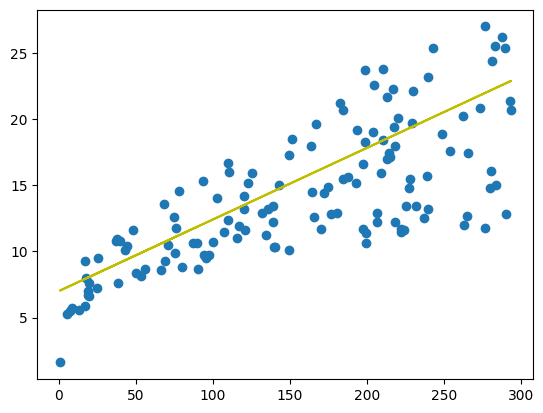

In [66]:
plt.scatter(x_train,y_train)
plt.plot(x_train,6.9955 + 0.0541 * x_train, 'y')
plt.show()

In [67]:
y_train_pred = model.predict(x_train_constant)
res = (y_train - y_train_pred)
res

46    -0.535023
2      1.439528
80     1.265688
56    -1.913327
62    -2.191889
         ...   
136    1.260131
30     1.087202
57    -0.035252
1      1.306490
119   -1.359838
Name: Sales, Length: 134, dtype: float64

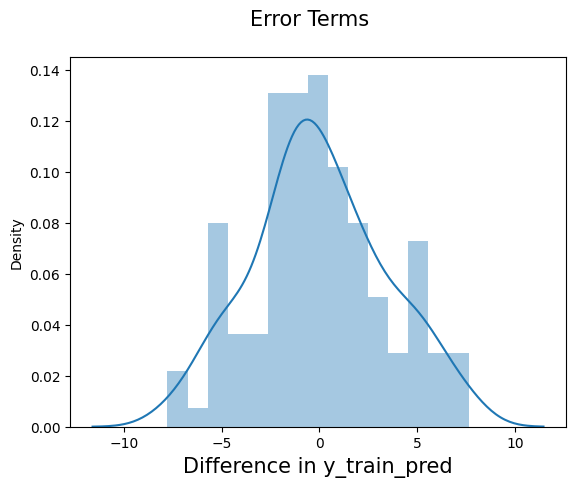

In [68]:
fig = plt.figure()
sns.distplot(res,bins = 15)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Difference in y_train_pred', fontsize = 15)
plt.show()

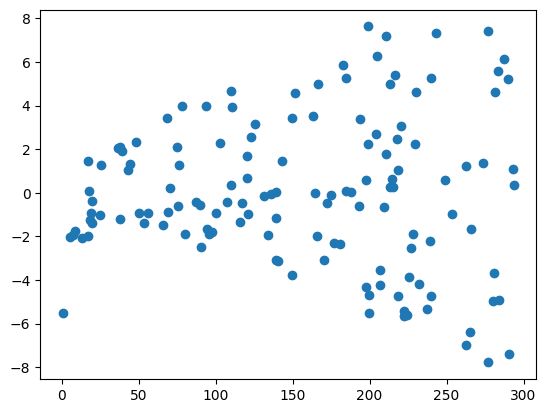

In [69]:
plt.scatter(x_train , res)
plt.show()

In [70]:
x_test_constant = sm.add_constant(x_test)
y_pred = model.predict(x_test_constant)

In [71]:
y_pred

array([11.47376964, 17.67509088, 10.45752982, 16.22977202, 14.15664278,
       15.71487718, 10.10523334,  9.68067093,  8.37536733, 13.31203457,
        7.67529101, 11.80799963, 17.01114753,  9.89746876, 10.53431238,
        7.43591007,  8.50634935, 13.73659698,  7.61205831, 10.39881374,
       18.88554543,  9.10254338, 18.00028763, 18.4158168 ,  8.21728558,
       18.30290126, 17.03373064, 10.14588294,  9.02576082, 15.01931747,
       10.95435818, 20.00115092, 13.19008579, 10.20911564,  7.47655967,
       13.4655997 , 14.45925641, 14.68960411,  8.3256845 , 12.18287921,
        8.29406815, 13.00490431,  9.77551998,  8.1585695 ,  7.84692262,
       11.42860343, 15.9090919 , 17.84220588, 17.92802168, 10.52979576,
       16.8575824 , 14.82058613, 15.07803355, 18.61906476, 15.57034529,
       20.47087955,  7.47204304, 12.92812175, 11.07179033, 17.91447182,
       17.38151049, 17.8060729 , 19.13847623, 10.48462955,  7.26879508,
       15.5929284 ])

In [72]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [73]:
np.sqrt(mean_squared_error(y_test,y_pred))

2.989691600256636

In [75]:
r2 = r2_score(y_test,y_pred)
r2

0.6963875456381696

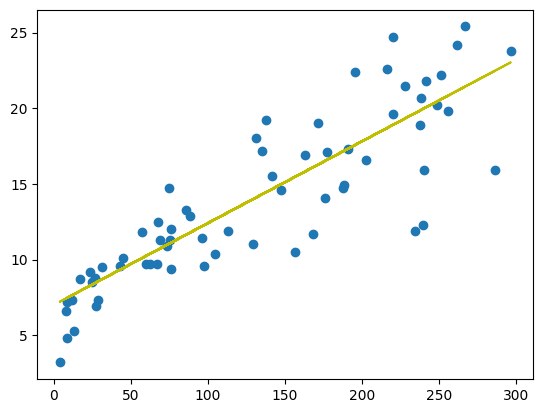

In [76]:
plt.scatter(x_test,y_test)
plt.plot(x_test,6.9955 + 0.0541 * x_test, 'y')
plt.show()